# Cross-matching HSC spec-z with Mizuki photo-z

Zooey Nguyen

2021-07-09

Cross-match on HSC v3 data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import gaussian_kde

In [5]:
matched_df = pd.read_csv('/data/HSC/crossmatched_mizuki.csv')
matched_df['specz_redshift'] = matched_df['user.specz_redshift']
matched_df = matched_df[(matched_df['specz_redshift'] < 4) & (matched_df['specz_redshift'] > 0.01)]
matched_df

,# object_id_1,ra,dec,coord,skymap_id,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,y_cmodel_mag,...,user.specz_ra_isnull,user.specz_dec,user.specz_dec_isnull,# object_id_2,photoz_mean,photoz_mode,photoz_median,photoz_best,photoz_mc,specz_redshift
0,3.640705e+16,29.056840,-6.577962,"(179117.015625, 99518.6015625, -23628.67578125)",82780005,22.837498,21.159599,19.852673,19.388729,19.089922,...,False,-6.577981,False,36407050493772092,0.728588,0.74,0.730579,0.72,0.682833,0.69359
1,3.641145e+16,30.558539,-6.526887,"(176465.515625, 104189.1328125, -23446.0078125)",82790005,22.436127,21.514543,21.500206,20.762743,20.606396,...,False,-6.526930,False,36411448540289198,0.433372,0.41,0.436842,0.44,0.430391,3.35212
2,3.641145e+16,30.543371,-6.386090,"(176542.1875, 104171.3828125, -22942.353515625)",82790006,20.334305,20.187168,20.052486,19.993616,19.983917,...,False,-6.386105,False,36411452835234997,2.630510,3.12,2.914635,2.97,2.950181,1.87373
3,3.641157e+16,30.505943,-7.082107,"(176357.046875, 103906.8828125, -25430.712890625)",82790102,NaN,NaN,18.991686,18.559502,18.323671,...,False,-7.082084,False,36411573094319196,0.656775,0.50,0.542383,0.52,0.521043,0.65135
4,3.641157e+16,30.505965,-7.082103,"(176357.015625, 103906.953125, -25430.69921875)",82790102,NaN,NaN,19.752621,19.054215,18.986214,...,False,-7.082084,False,36411573094333996,1.616625,1.45,1.541886,1.53,1.334849,0.65135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84346,7.464917e+16,213.891654,53.131447,"(-102728.234375, -69008.7890625, 165014.75)",169730806,23.193825,23.009663,23.018608,22.388508,22.453442,...,False,53.131367,False,74649168714423498,2.056234,3.06,2.302875,2.91,0.878034,1.39610
84348,7.464917e+16,213.931658,53.150962,"(-102633.3828125, -69049.1171875, 165056.890625)",169730806,21.715904,20.633490,19.773962,19.462294,19.047186,...,False,53.151004,False,74649168714424696,0.638046,0.57,0.639722,0.64,0.712306,0.58049
84349,7.464917e+16,213.641172,53.181188,"(-102909.6328125, -68479.640625, 165122.125)",169730806,22.936237,21.547894,20.488026,20.078617,19.820112,...,False,53.181250,False,74649168714427003,0.873041,0.07,0.266375,0.10,0.246350,0.57805
84350,7.464917e+16,213.936543,53.223860,"(-102453.1796875, -68940.5703125, 165214.140625)",169730806,23.914230,23.256207,22.850723,22.277344,22.233864,...,False,53.223904,False,74649168714429194,0.671866,0.68,0.679355,0.67,0.668927,3.04777


<AxesSubplot:xlabel='specz_redshift', ylabel='photoz_best'>

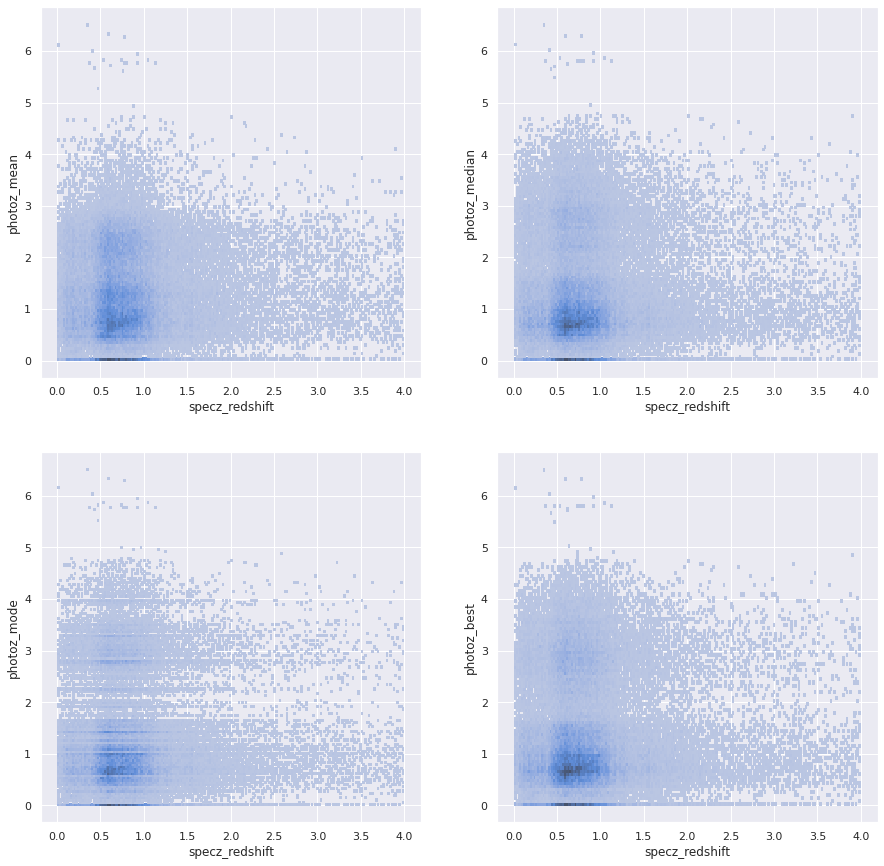

In [10]:
fig, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_mean'], ax=axes[0,0])
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_median'], ax=axes[0,1])
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_mode'], ax=axes[1,0])
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_best'], ax=axes[1,1])

<AxesSubplot:xlabel='specz_redshift', ylabel='photoz_mean'>

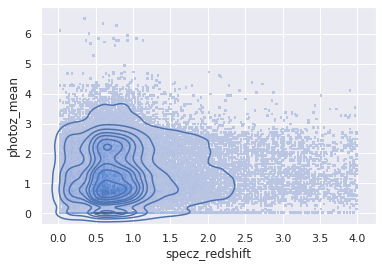

In [9]:
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_mean'])
sns.kdeplot(x=matched_df['specz_redshift'], y=matched_df['photoz_mean'])